This is a series by Kevin Markham

```
/lh/assets/code/pd-1.ipynb
```
https://github.com/justmarkham/pandas-videos

https://www.nytimes.com/interactive/2015/02/17/upshot/what-do-people-actually-order-at-chipotle.html

## top
[wip](http://localhost:8888/notebooks/Documents/GitHub/lh/assets/code/pd-1.ipynb#wip)

[https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb](https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

In [1]:
import pandas as pd

In [7]:
# pd.read_table('http://bit.ly/chiporders')
# standard format accepted, assumes tsv and header row
orders = pd.read_table('http://bit.ly/chiporders')

In [9]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [10]:
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

In [12]:
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols)

In [14]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [22]:
# How do I select a pandas series from a DataFrame?
ufo = pd.read_csv('http://bit.ly/uforeports')
type(ufo)

pandas.core.frame.DataFrame

In [23]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [27]:
type(ufo['City'])

pandas.core.series.Series

In [29]:
type(ufo.City)

pandas.core.series.Series

In [37]:
ufo['Location'] = ufo.City + ', ' + ufo.State

In [38]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [39]:
# Why do some pandas work with parens and some don't
movies = pd.read_csv('http://bit.ly/imdbratings')

In [40]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [46]:
movies.describe() # will add general stats on any numerical columns

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [47]:
movies['star_rating'].dtype

dtype('float64')

In [49]:
movies.shape # rows and colums

(979, 6)

In [50]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [53]:
movies.describe(include=['object']) # will print theo object types, shift tab in paren to get other attributes

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,The Girl with the Dragon Tattoo,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


In [55]:
# how do I rename columns in a pandas DataFrame?
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [57]:
del ufo['Location']

In [58]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [60]:
ufo.rename(columns = {'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace=True)

In [61]:
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

In [62]:
# quicker is
ufo_cols = ['City', 'colors reported', 'shape reported', 'state', 'time']
ufo.columns = ufo_cols
ufo.columns

Index(['City', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [64]:
# Can be done when reading the data in
ufo = pd.read_csv('http://bit.ly/uforeports')

In [65]:
# Shift tab will get the attributes available within a function
# Another tip is replacing all the spaces with underscore in a heading
ufo.columns = ufo.columns.str.replace(' ', '_')

In [66]:
ufo.columns

Index(['City', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

In [74]:
# How do I remove a columns from a pandas DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')

In [75]:
ufo.shape

(18241, 5)

In [76]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [77]:
ufo.drop('Colors Reported', axis=1, inplace=True)

In [78]:
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


In [79]:
# Drop row, use the 0 axis
ufo.drop(1, axis=0, inplace=True)
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00
5,Valley City,DISK,ND,9/15/1934 15:30


In [80]:
# How do I sort a pandas DataFrame (table) or series (column)
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [82]:
movies['title'].sort_values(ascending=False)


864                                  [Rec]
526                                   Zulu
615                             Zombieland
677                                 Zodiac
955                       Zero Dark Thirty
535                                  Zelig
280                     Young Frankenstein
96                                 Yojimbo
235                                Yip Man
403                             Ying xiong
695                      Y Tu Mama Tambien
871                                     X2
532                     X-Men: First Class
248             X-Men: Days of Future Past
954                                  X-Men
518                         Wreck-It Ralph
970                            Wonder Boys
65             Witness for the Prosecution
920                                Witness
483                           Withnail & I
270                        Wings of Desire
497    Willy Wonka & the Chocolate Factory
127                      Wild Strawberries
219        

In [83]:
movies.sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."
910,7.5,2046,R,Drama,129,"[u'Tony Chiu Wai Leung', u'Ziyi Zhang', u'Faye..."
596,7.7,21 Grams,R,Crime,124,"[u'Sean Penn', u'Benicio Del Toro', u'Naomi Wa..."
624,7.7,25th Hour,R,Crime,135,"[u'Edward Norton', u'Barry Pepper', u'Philip S..."
708,7.6,28 Days Later...,R,Horror,113,"[u'Cillian Murphy', u'Naomie Harris', u'Christ..."
60,8.5,3 Idiots,PG-13,Comedy,170,"[u'Aamir Khan', u'Madhavan', u'Mona Singh']"


In [86]:
movies.sort_values('duration', ascending=False) # Longest movies first

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
767,7.6,"It's a Mad, Mad, Mad, Mad World",APPROVED,Action,205,"[u'Spencer Tracy', u'Milton Berle', u'Ethel Me..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


In [87]:
movies.sort_values(['content_rating', 'duration']) # Two columns

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."
58,8.5,Paths of Glory,APPROVED,Drama,88,"[u'Kirk Douglas', u'Ralph Meeker', u'Adolphe M..."
210,8.1,Laura,APPROVED,Film-Noir,88,"[u'Gene Tierney', u'Dana Andrews', u'Clifton W..."
656,7.7,Snow White and the Seven Dwarfs,APPROVED,Animation,88,"[u'Adriana Caselotti', u'Harry Stockwell', u'L..."
844,7.5,Pinocchio,APPROVED,Animation,88,"[u'Dickie Jones', u'Christian Rub', u'Mel Blanc']"
233,8.1,The Night of the Hunter,APPROVED,Crime,92,"[u'Robert Mitchum', u'Shelley Winters', u'Lill..."


In [89]:
# How do I filter rows of a pandas DataFrame by Column value
movies.shape

(979, 6)

In [90]:
booleans = []
for l in movies.duration:
    if l >= 200:
        booleans.append(True)
    else:
        booleans.append(False)

In [92]:
len(booleans)

979

In [93]:
is_long = pd.Series(booleans)
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [94]:
# This is lond way
is_long = movies.duration >= 200
is_long.head()

0    False
1    False
2     True
3    False
4    False
Name: duration, dtype: bool

In [96]:
movies[movies.duration >= 200] # creates a list of bools inside

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [98]:
movies[movies.duration >= 200]['genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

In [108]:
# how do I apply multiple filters?
movies[movies.genre == 'Drama'][movies.duration >= 200][movies.content_rating == 'G']

/Users/halkypi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,star_rating,title,content_rating,genre,duration,actors_list
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


In [109]:
movies[(movies.genre == 'Drama') & (movies.content_rating == 'G')] # have to use & and | for and/or

,star_rating,title,content_rating,genre,duration,actors_list
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
168,8.2,Hachi: A Dog's Tale,G,Drama,93,"[u'Richard Gere', u'Joan Allen', u'Cary-Hiroyu..."
361,8.0,Fiddler on the Roof,G,Drama,181,"[u'Topol', u'Norma Crane', u'Leonard Frey']"


In [120]:
movies[(movies.genre.isin(['Drama', 'Crime'])) & (movies.content_rating == 'R')] 

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
16,8.7,One Flew Over the Cuckoo's Nest,R,Drama,133,"[u'Jack Nicholson', u'Louise Fletcher', u'Mich..."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
23,8.7,The Usual Suspects,R,Crime,106,"[u'Kevin Spacey', u'Gabriel Byrne', u'Chazz Pa..."
24,8.7,Se7en,R,Drama,127,"[u'Morgan Freeman', u'Brad Pitt', u'Kevin Spac..."
27,8.6,The Silence of the Lambs,R,Drama,118,"[u'Jodie Foster', u'Anthony Hopkins', u'Lawren..."


In [122]:
# How to only read in two rows from csv?
# Fastest way to read csv?
# How to define datatype before reading in?
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [147]:
ufo = pd.read_csv('http://bit.ly/uforeports',usecols=[0, 4], dtype={'Time':str}, nrows=3) # only columns 0 and 4, 
# convert one of the dtypes to a string and only read in first 3 rows
ufo.head()

,City,Time
0,Ithaca,6/1/1930 22:00
1,Willingboro,6/30/1930 20:00
2,Holyoke,2/15/1931 14:00


In [148]:
# How do DataFrames and Series work with iteration?
for c in ufo.City:
    print(c)

Ithaca
Willingboro
Holyoke


In [151]:
for index, row in ufo.iterrows():
    print(index, row.City, type(row.Time))

0 Ithaca <class 'str'>
1 Willingboro <class 'str'>
2 Holyoke <class 'str'>


In [152]:
# How to drop every non numeric value?
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [154]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [157]:
drinks.describe(include='all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,193
unique,193,NaN,NaN,NaN,NaN,6
top,Marshall Islands,NaN,NaN,NaN,NaN,Africa
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


In [158]:
drinks.describe(include=['float64'])

,total_litres_of_pure_alcohol
count,193.000000
mean,4.717098
std,3.773298
min,0.000000
25%,1.300000
50%,4.200000
75%,7.200000
max,14.400000


In [3]:
# How do I use the "axis" parameter in pandas?
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
drinks.drop('continent',axis=1).head() 


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [5]:
# did not use inplace so the data is still there
drinks.drop(2,axis=0).head() 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [7]:
drinks.mean() # mean of all the numeric columns

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [15]:
drinks.mean(axis='index').shape

(4,)

In [13]:
drinks.mean(axis='columns').shape

(193,)

In [16]:
drinks.mean(axis='index')

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [19]:
# How do I string methods in pandas?
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [20]:
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
5                                CHICKEN BOWL
6                               SIDE OF CHIPS
7                               STEAK BURRITO
8                            STEAK SOFT TACOS
9                               STEAK BURRITO
10                        CHIPS AND GUACAMOLE
11                       CHICKEN CRISPY TACOS
12                         CHICKEN SOFT TACOS
13                               CHICKEN BOWL
14                        CHIPS AND GUACAMOLE
15      CHIPS AND TOMATILLO-GREEN CHILI SALSA
16                            CHICKEN BURRITO
17                            CHICKEN BURRITO
18                                CANNED SODA
19                               CHICKEN BOWL
20                        CHIPS AND GUACAMOLE
21                           BARBA

In [22]:
orders[orders.item_name.str.contains('Chicken')]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$8.49
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$8.75
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",$10.98
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",$8.49


In [24]:
# it is possible to string methods together
orders.choice_description.str.replace('[', '').str.replace(']','')

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
5       Fresh Tomato Salsa (Mild), Rice, Cheese, Sour ...
6                                                     NaN
7       Tomatillo Red Chili Salsa, Fajita Vegetables, ...
8       Tomatillo Green Chili Salsa, Pinto Beans, Chee...
9       Fresh Tomato Salsa, Rice, Black Beans, Pinto B...
10                                                    NaN
11      Roasted Chili Corn Salsa, Fajita Vegetables, R...
12      Roasted Chili Corn Salsa, Rice, Black Beans, C...
13      Fresh Tomato Salsa, Fajita Vegetables, Rice, C...
14                                                    NaN
15                                                    NaN
16      Tomatillo-Green Chili Salsa (Medium), Pinto Be...
17      Fresh 

In [27]:
# also takes regex
orders.choice_description.str.replace('[aeiou]', '*')

0                                                     NaN
1                                            [Cl*m*nt*n*]
2                                                 [Appl*]
3                                                     NaN
4       [T*m*t*ll*-R*d Ch*l* S*ls* (H*t), [Bl*ck B**ns...
5       [Fr*sh T*m*t* S*ls* (M*ld), [R*c*, Ch**s*, S**...
6                                                     NaN
7       [T*m*t*ll* R*d Ch*l* S*ls*, [F*j*t* V*g*t*bl*s...
8       [T*m*t*ll* Gr**n Ch*l* S*ls*, [P*nt* B**ns, Ch...
9       [Fr*sh T*m*t* S*ls*, [R*c*, Bl*ck B**ns, P*nt*...
10                                                    NaN
11      [R**st*d Ch*l* C*rn S*ls*, [F*j*t* V*g*t*bl*s,...
12      [R**st*d Ch*l* C*rn S*ls*, [R*c*, Bl*ck B**ns,...
13      [Fr*sh T*m*t* S*ls*, [F*j*t* V*g*t*bl*s, R*c*,...
14                                                    NaN
15                                                    NaN
16      [T*m*t*ll*-Gr**n Ch*l* S*ls* (M*d**m), [P*nt* ...
17      [Fr*sh

In [28]:
# How do I change the data type of a panda series?
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [29]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [31]:
drinks['beer_servings'] = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [41]:
# to do this on read in, use a dictionary
drinks = pd.read_csv('http://bit.ly/drinksbycountry',dtype={'beer_servings':float})
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

https://www.youtube.com/watch?v=qy0fDqoMJx8&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=14

When should I use a "groupby" in pandas?

In [1]:
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [2]:
# What is the average beer serving across servings?
drinks.beer_servings.mean()

106.16062176165804

In [3]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [4]:
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [5]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [6]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

In [7]:
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [8]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


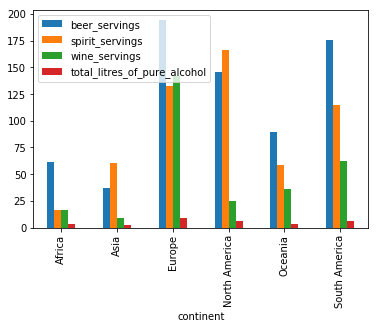

In [9]:
%matplotlib inline
drinks.groupby('continent').mean().plot(kind='bar')

In [11]:
# How do I explore a pandas Series?
# https://youtu.be/QTVTq8SPzxM
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [12]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [13]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [19]:
movies.groupby('genre').agg(['count', 'min', 'max', 'mean'])

star_rating                     duration                      
                count  min  max      mean    count  min  max        mean
genre                                                                   
Action            136  7.4  9.0  7.884559      136   80  205  126.485294
Adventure          75  7.4  8.9  7.933333       75   89  224  134.840000
Animation          62  7.4  8.6  7.914516       62   75  134   96.596774
Biography          77  7.4  8.9  7.862338       77   85  202  131.844156
Comedy            156  7.4  8.6  7.822436      156   68  187  107.602564
Crime             124  7.4  9.3  7.916935      124   67  229  122.298387
Drama             278  7.4  8.9  7.902518      278   64  242  126.539568
Family              2  7.8  7.9  7.850000        2  100  115  107.500000
Fantasy             1  7.7  7.7  7.700000        1  112  112  112.000000
Film-Noir           3  7.7  8.3  8.033333        3   88  111   97.333333
History             1  8.0  8.0  8.000000        1   66   66   66.000000
Horror             29  7.4  8.6  7.806897       29   70  146  102.517241
Mystery            16  7.4  8.6  7.975000       16   69  160  115.625000
Sci-Fi              5  7.7  8.2  7.920000        5   91  132  109.000000
Thriller            5  7.5  8.0  7.680000        5  107  120  114.200000
Western             9  7.6  8.9  8.255556        9   85  175  136.666667

In [16]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [20]:
movies.genre.value_counts(normalize=True) # shows percentages

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [21]:
type(movies.genre.value_counts())

pandas.core.series.Series

In [22]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [23]:
movies.genre.nunique()  # number of unique

16

In [27]:
pd.crosstab(movies.genre, movies.content_rating) # Compute a simple cross-tabulation of two (or more) factors.

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [28]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

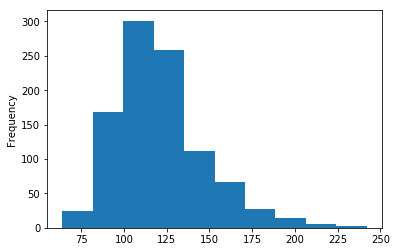

In [29]:
%matplotlib inline
movies.duration.plot(kind='hist')

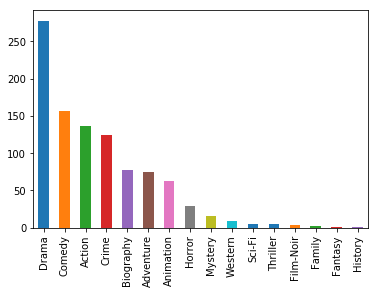

In [32]:
movies.genre.value_counts().plot(kind='bar')

In [33]:
# How do I handle missing values in Pandas?
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.tail() # NaN means missing value

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


```
Grant Park,,TRIANGLE,IL,12/31/2000 23:00
Spirit Lake,,DISK,IA,12/31/2000 23:00
Eagle River,,,WI,12/31/2000 23:45
Eagle River,RED,LIGHT,WI,12/31/2000 23:45
Ybor,,OVAL,FL,12/31/2000 23:59
```

In [35]:
ufo.isnull().tail() # True if missing, False if not

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [36]:
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [37]:
ufo.isnull().sum() # number of missing value in each column

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [38]:
pd.Series([1,0,1]).sum()

2

In [39]:
ufo[ufo.City.isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [40]:
ufo.shape

(18241, 5)

In [43]:
ufo.dropna(how='any').shape # drop if any values are missing from any column
# ufo.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

(2486, 5)

In [44]:
ufo.dropna(how='all').shape

(18241, 5)

In [45]:
ufo.dropna(subset=['City','Shape Reported'],how='any').shape

(15576, 5)

In [48]:
ufo['Shape Reported'].value_counts(dropna=False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
DOME            1
HEXAGON         1
FLARE           1
PYRAMID         1
Name: Shape Reported, dtype: int64

In [49]:
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

In [50]:
ufo['Shape Reported'].value_counts(dropna=False)

VARIOUS      2977
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
DOME            1
HEXAGON         1
FLARE           1
PYRAMID         1
Name: Shape Reported, dtype: int64

## wip
## https://youtu.be/OYZNk7Z9s6I
## What do I need to know about the pandas index? (Part 1) (13:36)
[top](http://localhost:8888/notebooks/Documents/GitHub/lh/assets/code/pd-1.ipynb#top)